In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]= os.getenv("Groq_API_Key")

groq_llm=ChatGroq(model="qwen/qwen3-32b")

result=groq_llm.invoke("Hello")

result

AIMessage(content='<think>\nOkay, the user sent "Hello". That\'s a greeting. I should respond politely. Let me check the guidelines. Keep it friendly and open. Maybe ask how I can assist them. Keep the response simple and welcoming. Alright, something like "Hello! How can I assist you today?" Yeah, that sounds good.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 9, 'total_tokens': 88, 'completion_time': 0.189022012, 'prompt_time': 0.00036754, 'queue_time': 0.21507691, 'total_time': 0.189389552}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8847baf0-7d2a-48e1-83b7-cc9408dfabee-0', usage_metadata={'input_tokens': 9, 'output_tokens': 79, 'total_tokens': 88})

In [12]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image,display

## Graph State


class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str


In [13]:
# Nodes

def generate_characters(state:State):
    msg=groq_llm.invoke(f"create a two characters names and breif traits for story about {state["topic"]}")
    return {"characters":msg.content}

def generate_setting(state:State):
    msg=groq_llm.invoke(f"Describe a vivid setting for a story about {state["topic"]}")
    return {"settings":msg.content}

def generate_premise(state:State):
    msg=groq_llm.invoke(f"write a one sentence plot premise for a story about {state["topic"]}")
    return {"premises":msg.content}


def combine_elements(state:State):
    msg=groq_llm.invoke(
        f"Write a short story introducing using these elements:\n"
        f"Characters:{state["characters"]}\n"
        f"Setting:{state["settings"]}\n"
        f"Premise: {state["premises"]}"
    )
    return {"story_intro":msg.content}


In [14]:
# Build the graph

graph=StateGraph(State)
graph.add_node("character",generate_characters)
graph.add_node("settings",generate_setting)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements)

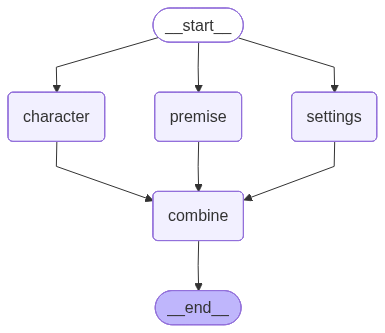

In [15]:
## adding Edges
graph.add_edge(START,"character")
graph.add_edge(START,"settings")
graph.add_edge(START,"premise")
graph.add_edge("character","combine")
graph.add_edge("settings","combine")
graph.add_edge("premise","combine")
graph.add_edge("combine",END)

compiled_graph=graph.compile()
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))


In [16]:
state={"topic":"time travel"}
result=compiled_graph.invoke(state)
print(result["story_intro"])

<think>
Okay, the user wants a short story incorporating time travel elements. Let me start by recalling the characters and setting they provided. The characters are Dr. Elara Voss, a physicist haunted by her wife's death, and Kael Renner, a pilot with a tragic past. The setting is the Chronosynclastic Lighthouse of Eon Dunes, a place where time fractures and timelines converge.

First, I need to introduce Elara and Kael. Elara is driven by guilt, trying to fix the past, while Kael is pragmatic and skeptical. Their dynamic should show tension but also mutual respect. The lighthouse is a key element here—describing it as a mysterious, shifting structure with dangerous doorways into different eras.

The premise from the user involves a physicist trying to undo a mistake, leading to unintended consequences. I should mirror that in the story. Maybe Elara's attempt to save her wife causes a timeline collapse, and Kael is there to prevent it. 

I need to include vivid elements from the setti

In [8]:
""

''